In [13]:
#threshold for significance
sig_thresh = 1e-4

In [14]:
#common
%pylab inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

import pandas as pd

datadir = "../mashr/firstSuccessfulFullRun/output/" #TODO CHANGE THIS

lfsr = pd.read_csv(datadir + "posterior_lfsr.tsv", sep="\t", index_col=0)
betas = pd.read_csv(datadir + "posterior_betas.tsv", sep="\t", index_col=0)
beta_ses = pd.read_csv(datadir + "posterior_beta_ses.tsv", sep="\t", index_col=0)
ntissues = len(lfsr.columns)

COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
    "permuted": "gray"
}

SHORTEN = {
    "Artery-Aorta":"Artery A."     ,
    "Artery-Tibial": "Artery T.",
    "Adipose-Subcutaneous": "Adipose S.",    
    "Adipose-Visceral":"Adipose V.",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "E. Mucosa",
    "Esophagus-Muscularis":"E Muscularis",
    "Heart-LeftVentricle":"Ventricle",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "Skin Unexposed",
    "Skin-SunExposed":"Skin Leg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood",
    "permuted":"Permuted",
    "LCL": "LCL"
}

Populating the interactive namespace from numpy and matplotlib


In [22]:
#get best estrs per gene
import scipy.stats as stats
zscores = betas.div(beta_ses).abs()
pvalues = 2*(1- stats.norm.cdf(zscores))
pvalues = pd.DataFrame(pvalues)
pvalues.index = zscores.index

geneToBestSTR = {}
geneToBestPVal = {}
def considerForBest(row):
    nameParts = row.iloc[0].split("_")
    gene = nameParts[0] + "_" + nameParts[1]
    estr = nameParts[2] + "_" + nameParts[3]
    minPVal = row.iloc[1:].min()
    if minPVal < sig_thresh:
        if not gene in geneToBestSTR or minPVal < geneToBestPVal[gene]:
            geneToBestSTR[gene] = estr
            geneToBestPVal[gene] = minPVal
pvalues.reset_index().apply(considerForBest, axis=1)

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
226317    None
226318    None
226319    None
226320    None
226321    None
226322    None
226323    None
226324    None
226325    None
226326    None
226327    None
226328    None
226329    None
226330    None
226331    None
226332    None
226333    None
226334    None
226335    None
226336    None
226337    None
226338    None
226339    None
226340    None
226341    None
226342    None
226343    None
226344    None
226345    None
226346    None
Length: 226347, dtype: object

In [24]:
len(geneToBestSTR)

5186

In [3]:
#old code for dealing with eSTRS with a local lfsr threshold
#number of significant eSTRs
significantESTRs = (lfsr <= lfsr_thresh).apply(any, axis=1) #significant in any tissue
print("Number of significant eSTRs:", np.sum(significantESTRs))

Number of significant eSTRs: 16972


In [4]:
#old code for dealing with eSTRS with a local lfsr threshold
#lfsr effect sharing per gene

geneToNumESTRs = {}
def addIfGene(row):
    geneName = row.iloc[0].split("_")[0]
    if not geneName in geneToNumESTRs:
        geneToNumESTRs[geneName] = 0
    if type(row.iloc[1]) != type(False):
        print(row)
    geneToNumESTRs[geneName] += row.iloc[1] 
significantESTRs.reset_index().apply(addIfGene, axis=1)
pass

In [5]:
#old code for dealing with eSTRS with a local lfsr threshold
len(geneToNumESTRs)

13843

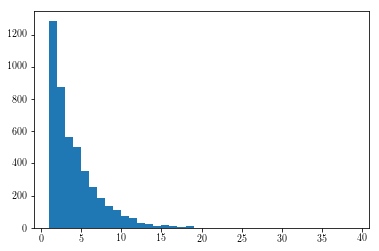

In [7]:
#old code for dealing with eSTRS with a local lfsr threshold
fig, ax = plt.subplots()
im = ax.hist(list(geneToNumESTRs.values()), bins=range(1,40))
#ax.set_yscale()

In [4]:
#Heatmaps

#Result is similar by pattern to mashr fig 6 https://www.nature.com/articles/s41588-018-0268-8#MOESM1
#shared significance threshold (e.g. must be within 2x of each other, must be >1)
sharing_thresh = 2

#order same as (subset of) fig2a https://www.nature.com/articles/nature24277.pdf
ORDER = [ \
    'Brain-Caudate',
    'Brain-Cerebellum',
    'WholeBlood',
    'Cells-Transformedfibroblasts',
    'Muscle-Skeletal',
    'Heart-LeftVentricle',
    'Esophagus-Mucosa',
    'Skin-NotSunExposed',
    'Skin-SunExposed',
    'Thyroid',
    'Esophagus-Muscularis',
    'Artery-Aorta',
    'Artery-Tibial',
    'Lung',
    'Nerve-Tibial',     
    'Adipose-Subcutaneous',
    'Adipose-Visceral'
]

for i in range(len(ORDER)):
    ORDER[i] = ORDER[i].replace("-", ".")
o_lfsr = lfsr.loc[:, ORDER]
o_betas = betas.loc[:, ORDER]
    
shareMatrix = np.full((ntissues, ntissues), np.nan)
for tissue1 in np.arange(ntissues):
    for tissue2 in np.arange(tissue1):
        significant = (o_lfsr.iloc[:, tissue1] <= lfsr_thresh) | (o_lfsr.iloc[:, tissue2] <= lfsr_thresh)
        sharedEffects = ((o_betas.iloc[:, tissue1] <= sharing_thresh*o_betas.iloc[:, tissue2]) & \
                         (o_betas.iloc[:, tissue2] <= sharing_thresh*o_betas.iloc[:, tissue1]))
        shareMatrix[tissue2, tissue1] = np.sum(sharedEffects & significant)/np.sum(significant)

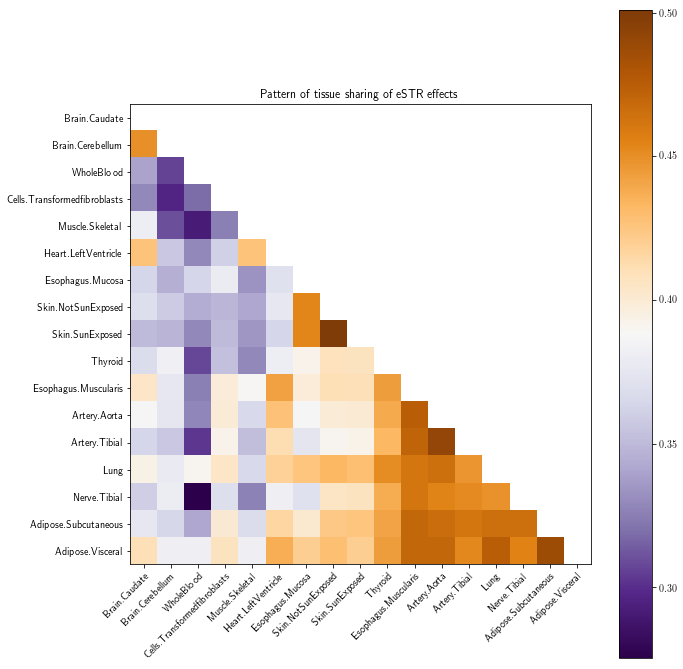

In [6]:
from matplotlib.colors import Colormap
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(shareMatrix.T, cmap="PuOr_r")
fig.colorbar(im)

# We want to show all ticks...
ax.set_xticks(np.arange(ntissues))
ax.set_yticks(np.arange(ntissues))
# ... and label them with the respective list entries
ax.set_xticklabels(o_lfsr.columns.values)
ax.set_yticklabels(o_lfsr.columns.values)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

'''
# Loop over data dimensions and create text annotations.
for i in range(len(lfsr.columns)):
    for j in range(len(lfsr.columns)):
        text = ax.text(j, i, shareMatrix[i, j],
                       ha="center", va="center", color="w")
'''    

ax.set_title("Pattern of tissue sharing of eSTR effects")
fig.tight_layout()
plt.show()

#correlation


In [ ]:
#lfsr effect sharing per tissue